## 1. 데이터 가공

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

users = pd.read_csv('선호도.csv')
users.head()

,Unnamed: 0,user,genre,like,dislike
0,0,0,"['일상', '개그', '판타지', '액션', '스릴러']","['가담항설', '모죠의 일지', '내일', '남과 여', '호러와 로맨스', '하...",['외모지상주의']
1,1,1,"['일상', '액션', '드라마', '스릴러']","['하르모니아', '하이브', '당신의 과녁', '유미의 세포들', '후기', '쌍...","['복학왕', '여신강림', '랜덤채팅의 그녀!', '뷰티풀 군바리', '프리드로우..."
2,2,2,"['개그', '판타지', '액션', '스릴러']","['모죠의 일지', '전지적 독자 시점', '신의 탑', '하루만 네가 되고 싶어'...","['복학왕', '내 ID는 강남미인!', '외모지상주의', '여신강림']"
3,3,3,"['일상', '개그', '판타지', '액션', '스릴러']","['가담항설', '싸우자귀신아', '하나의 하루', '내일', '호러와 로맨스', ...","['외모지상주의', '랜덤채팅의 그녀!', '여신강림']"
4,4,4,"['일상', '개그']","['딩스뚱스', '낢이 사는 이야기']",['nan']


In [2]:
users = users.drop(columns = ['Unnamed: 0', 'genre'], axis = 1)
users.tail(1)

,user,like,dislike
103,103,"['알고있지만', '연애혁명']",['nan']


In [3]:
from ast import literal_eval

In [4]:
preference = pd.DataFrame()
preference.tail(1)

""


In [5]:
only_like = pd.DataFrame()
only_like.tail(1)

""


In [6]:
# 좋아요: 1, 싫어요: -1, 안 본 웹툰: 0
for u in range(len(users)):
    like = literal_eval(users.loc[u, 'like'])
    dislike = literal_eval(users.loc[u, 'dislike'])
    
    for title in like:
        preference.loc[u, title] = 1
        only_like.loc[u, title] = 1
    
    for title in dislike:
        if title == 'nan':
            continue
        preference.loc[u, title] = -1

In [7]:
preference = preference.fillna(0)
preference.head(3)

,가담항설,모죠의 일지,내일,남과 여,호러와 로맨스,하나의 하루,싸우자귀신아,외모지상주의,하르모니아,하이브,...,5kg을 위하여,유령극단,텃밭부 사건일지,스크립토리움,ㄹㅇ 관종,안녕 나의 모모로,모던패밀리,소나기야,공감.jpg,언터처블
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,-1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
only_like = only_like.fillna(0)
only_like.head(3)

,가담항설,모죠의 일지,내일,남과 여,호러와 로맨스,하나의 하루,싸우자귀신아,하르모니아,하이브,당신의 과녁,...,일상날개짓,5kg을 위하여,유령극단,텃밭부 사건일지,스크립토리움,ㄹㅇ 관종,안녕 나의 모모로,모던패밀리,소나기야,언터처블
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 2. 유사도 산출
- Cosine 유사도 <<< 선택, 좋아요/싫어요 데이터 다 포함 가능
- Euclidean 유사도
- Jaccard 유사도 

In [9]:
preference_matrix = preference.transpose()
preference_matrix.head(1)

,0,1,2,3,4,5,6,7,8,9,...,94,95,96,97,98,99,100,101,102,103
가담항설,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [10]:
only_like_matrix = only_like.transpose()
only_like_matrix.head(1)

,0,1,2,3,4,5,6,7,8,9,...,94,95,96,97,98,99,100,101,102,103
가담항설,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


### 2-1. Cosine 유사도

In [11]:
from sklearn.metrics.pairwise import cosine_similarity

In [12]:
# 코사인 유사도 계산
item_cosine_sim = cosine_similarity(preference_matrix, preference_matrix)
print(item_cosine_sim)

[[1.         0.21821789 0.43643578 ... 0.         0.         0.        ]
 [0.21821789 1.         0.33333333 ... 0.         0.         0.        ]
 [0.43643578 0.33333333 1.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 1.         0.         0.        ]
 [0.         0.         0.         ... 0.         1.         0.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]]


In [13]:
item_cosine_sim_df = pd.DataFrame(item_cosine_sim, index=preference_matrix.index, columns=preference_matrix.index)
print(item_cosine_sim_df.shape)

(303, 303)


In [14]:
item_cosine_sim_df.head(3)

,가담항설,모죠의 일지,내일,남과 여,호러와 로맨스,하나의 하루,싸우자귀신아,외모지상주의,하르모니아,하이브,...,5kg을 위하여,유령극단,텃밭부 사건일지,스크립토리움,ㄹㅇ 관종,안녕 나의 모모로,모던패밀리,소나기야,공감.jpg,언터처블
가담항설,1.000000,0.218218,0.436436,0.267261,0.534522,0.534522,0.534522,-0.183340,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
모죠의 일지,0.218218,1.000000,0.333333,0.204124,0.408248,0.408248,0.408248,-0.210042,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
내일,0.436436,0.333333,1.000000,0.408248,0.816497,0.816497,0.816497,-0.280056,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 2-2. Euclidean 유사도

In [15]:
from sklearn.metrics.pairwise import euclidean_distances

In [16]:
def l1_norm(value):
    norm = np.sum(value, axis=1)
    return value / norm

In [17]:
# 유클리디안 유사도 계산 & l1 정규화
item_euclidean_sim = euclidean_distances(only_like_matrix, only_like_matrix)
item_euclidean_sim = l1_norm(item_euclidean_sim) 
print(item_euclidean_sim)

[[0.         0.00384209 0.00413254 ... 0.00770461 0.00770461 0.00627694]
 [0.00479787 0.         0.00559548 ... 0.00982149 0.00982149 0.00800157]
 [0.00303444 0.00329017 0.         ... 0.00544798 0.00544798 0.00443847]
 ...
 [0.00350387 0.00357679 0.0033742  ... 0.         0.         0.00313847]
 [0.00350387 0.00357679 0.0033742  ... 0.         0.         0.00313847]
 [0.00350387 0.00357679 0.0033742  ... 0.00385231 0.00385231 0.        ]]


In [18]:
item_euclidean_sim_df = pd.DataFrame(item_euclidean_sim, index=only_like_matrix.index, columns=only_like_matrix.index)
print(item_euclidean_sim_df.shape)

(277, 277)


In [19]:
item_euclidean_sim_df.head(3)

,가담항설,모죠의 일지,내일,남과 여,호러와 로맨스,하나의 하루,싸우자귀신아,하르모니아,하이브,당신의 과녁,...,일상날개짓,5kg을 위하여,유령극단,텃밭부 사건일지,스크립토리움,ㄹㅇ 관종,안녕 나의 모모로,모던패밀리,소나기야,언터처블
가담항설,0.000000,0.003842,0.004133,0.005032,0.004276,0.004276,0.004276,0.006358,0.006358,0.005742,...,0.007705,0.007705,0.007705,0.007705,0.007705,0.007705,0.007705,0.007705,0.007705,0.006277
모죠의 일지,0.004798,0.000000,0.005595,0.006589,0.006047,0.006047,0.006047,0.008105,0.008105,0.007161,...,0.009821,0.009821,0.009821,0.009821,0.009821,0.009821,0.009821,0.009821,0.009821,0.008002
내일,0.003034,0.003290,0.000000,0.003294,0.001912,0.001912,0.001912,0.004496,0.004496,0.004280,...,0.005448,0.005448,0.005448,0.005448,0.005448,0.005448,0.005448,0.005448,0.005448,0.004438


In [59]:
np.any(item_euclidean_sim_df < 0)

False

### 2-3. Jaccard 유사도

In [60]:
def jaccard_sim(w1, w2):
    intersection = np.dot(w1, w2.T)
    
    # broadcasting: (277, 1) + (1, 277) → (277, 277)
    union = w1.sum(axis=1, keepdims=True)+w2.T.sum(axis=0, keepdims = True)
    union -= intersection
    
    if np.all(union == 0):
        return 1.0
    else:
        return intersection/union

In [61]:
# 자카드 선호 유사도 계산
item_jaccard_sim = jaccard_sim(only_like_matrix.values, only_like_matrix.values)
item_jaccard_sim_df = pd.DataFrame(item_jaccard_sim, index=only_like_matrix.index, columns=only_like_matrix.index)
print(item_like_jaccard_sim_df.shape)

(277, 277)


In [62]:
item_like_jaccard_sim_df.head(3)

,가담항설,모죠의 일지,내일,남과 여,호러와 로맨스,하나의 하루,싸우자귀신아,하르모니아,하이브,당신의 과녁,...,일상날개짓,5kg을 위하여,유령극단,텃밭부 사건일지,스크립토리움,ㄹㅇ 관종,안녕 나의 모모로,모던패밀리,소나기야,언터처블
가담항설,1.000000,0.117647,0.250000,0.125000,0.285714,0.285714,0.285714,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
모죠의 일지,0.117647,1.000000,0.153846,0.076923,0.166667,0.166667,0.166667,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
내일,0.250000,0.153846,1.000000,0.250000,0.666667,0.666667,0.666667,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# 3. 개인화 추천

#### top_n: 최대 추천 개수
- top_n: 3으로 설정

In [63]:
n_df = only_like_matrix.sum(axis = 1)
n_df

가담항설          7.0
모죠의 일지       12.0
내일            3.0
남과 여          2.0
호러와 로맨스       2.0
             ... 
ㄹㅇ 관종         1.0
안녕 나의 모모로     1.0
모던패밀리         1.0
소나기야          1.0
언터처블          1.0
Length: 277, dtype: float64

[184, 51, 15, 4, 9, 4, 3, 1, 0, 1, 3, 1, 0, 0, 1]


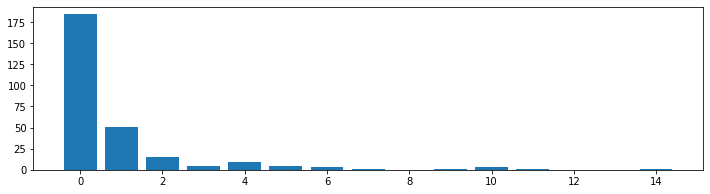

In [64]:
count = [0] * int(n_df.max())
for i in range(len(n_df)):
    count[int(n_df[i])-1] += 1

print(count)
plt.figure(figsize=(12, 3))
plt.bar(np.arange(0, len(count)), count)
plt.show()

## 3-1. predict_pref: 선호도 예측 함수 

In [65]:
from sklearn.metrics import mean_squared_error

# 사용자가 좋아요 or 싫어요를 부여한 웹툰에 대해서만 MSE를 구함
def get_mse(pred, actual):
    pred = pred[actual.nonzero()].flatten()
    actual = actual[actual.nonzero()].flatten()
    return mean_squared_error(pred, actual)

In [66]:
def predict_pref(preference, item_sim):
    pred = np.dot(preference, item_sim) / np.array([np.abs(item_sim).sum(axis=1)])  
    return pred

## 3-2. MSE error

In [67]:
import warnings
warnings.filterwarnings('ignore')

In [68]:
pref_cosine_pred = predict_pref(preference.values, item_cosine_sim_df.values)
print("아이템 기반 모든 최근접이웃 MSE - cosine 유사도:", get_mse(pref_cosine_pred, preference.values))

pref_euclidean_pred = predict_pref(only_like.values, item_euclidean_sim_df.values)
print("아이템 기반 모든 최근접이웃 MSE - euclidean 유사도:", get_mse(pref_euclidean_pred, only_like.values))

pref_jaccard_pred = predict_pref(only_like.values, item_jaccard_sim_df.values)
print("아이템 기반 모든 최근접이웃 MSE - jaccard 유사도:", get_mse(pref_like_jaccard_pred, only_like.values))

아이템 기반 모든 최근접이웃 MSE - cosine 유사도: 0.3346025841121929
아이템 기반 모든 최근접이웃 MSE - euclidean 유사도: 0.9334258453967612
아이템 기반 모든 최근접이웃 MSE - jaccard 유사도: 0.23494467980185502


## 3-3. 결과
- 최대 3개 추천

In [71]:
# 계산된 예측 선호도 데이터를 DataFrame으로 재생성
pref_cosine_pred_matrix = pd.DataFrame(data=pref_cosine_pred, index=preference.index, columns = preference.columns)
pref_euclidean_pred_matrix = pd.DataFrame(data=pref_euclidean_pred, index=only_like.index, columns = only_like.columns)
pref_jaccard_pred_matrix = pd.DataFrame(data=pref_jaccard_pred, index=only_like.index, columns = only_like.columns)

In [135]:
def show_result(p, preference, pref_pred_matrix, user_id, lb, ub, top_n):
    
    ## p: True- user가 좋아하는 웹툰 출력
    ## preference: 실제 선호도
    ## pref_pred_matrix: 예측 선호도
    ## user_id: user id
    ## lb: 추천 경계값 lower bound
    ## ub: 추천 경계값 upper bound
    ## top_n: 최대 top_n개까지 추천
    
    def get_unseen(preference, user_id):
        user_pref = preference.loc[user_id, :]
        seen_data = user_pref[user_pref!=0].index.tolist()
        webtoon = preference.columns.tolist()
        unseen_data = [w for w in webtoon if w not in seen_data]
        return unseen_data

    def recommend(pref_pred_matrix, user_id, unseen_data, lb, ub, top_n):    
        recomm = pref_pred_matrix.loc[user_id, unseen_data].sort_values(ascending=False)
        recomm = recomm[recomm < ub]
        recomm = recomm[recomm >= lb][:top_n]
        return recomm
    
    # user가 좋아하는 웹툰 출력
    if p is True:
        user_pref_webtoon = preference.loc[user_id, :]
        print(f'  user{user_id}이(가) 좋아하는 웹툰')
        print(user_pref_webtoon[user_pref_webtoon > 0].sort_values(ascending = False))
    
    # unseen_data: user가 안 본 웹툰
    unseen_data = get_unseen(preference, user_id)
    recomm = recommend(pref_pred_matrix, user_id, unseen_data, lb, ub, top_n)
    recomm = pd.DataFrame(recomm.values, index=recomm.index, columns = ['pred_score'])
    
    return recomm

### 코사인 유사도

In [136]:
for i in range(len(users)):
    result = show_result(True, preference, pref_cosine_pred_matrix, i, 0.2, 1, 3)
    print(f'\n{result}\n------------------------------------------------------------------')

  user0이(가) 좋아하는 웹툰
가담항설       1.0
모죠의 일지     1.0
내일         1.0
남과 여       1.0
호러와 로맨스    1.0
하나의 하루     1.0
싸우자귀신아     1.0
Name: 0, dtype: float64

          pred_score
악마와 계약연애    0.593068
------------------------------------------------------------------
  user1이(가) 좋아하는 웹툰
하르모니아            1.0
하이브              1.0
당신의 과녁           1.0
유미의 세포들          1.0
후기               1.0
쌍갑포차             1.0
파이게임             1.0
머니게임             1.0
노네임드(NoNameD)    1.0
Name: 1, dtype: float64

           pred_score
냄새를 보는 소녀    0.345124
신도림          0.334273
친애하는 X       0.327199
------------------------------------------------------------------
  user2이(가) 좋아하는 웹툰
모죠의 일지          1.0
전지적 독자 시점       1.0
신의 탑            1.0
하루만 네가 되고 싶어    1.0
겟백              1.0
죽음에 관하여         1.0
윈드브레이커          1.0
Name: 2, dtype: float64

          pred_score
가슴털 로망스     0.421406
구름의 이동속도    0.333581
고래별         0.228936
------------------------------------------------------------------
  user3이(가) 좋아하는

치즈인더트랩        1.0
간 떨어지는 동거     1.0
N번째 연애        1.0
그들이 사귀는 세상    1.0
Name: 49, dtype: float64

      pred_score
언터처블    0.307287
------------------------------------------------------------------
  user50이(가) 좋아하는 웹툰
모죠의 일지    1.0
Name: 50, dtype: float64

Empty DataFrame
Columns: [pred_score]
Index: []
------------------------------------------------------------------
  user51이(가) 좋아하는 웹툰
신의 탑     1.0
마음의소리    1.0
노블레스     1.0
Name: 51, dtype: float64

               pred_score
트레이스             0.373469
오로지 너를 이기고 싶어    0.216784
------------------------------------------------------------------
  user52이(가) 좋아하는 웹툰
복학왕       1.0
연애혁명      1.0
치즈인더트랩    1.0
Name: 52, dtype: float64

       pred_score
하루 3컷    0.252668
------------------------------------------------------------------
  user53이(가) 좋아하는 웹툰
전지적 독자 시점                 1.0
신의 탑                      1.0
하루만 네가 되고 싶어              1.0
비밀 사이                     1.0
왕년엔 용사님                   1.0
하렘의 남자들                   1.0
화


Empty DataFrame
Columns: [pred_score]
Index: []
------------------------------------------------------------------
  user96이(가) 좋아하는 웹툰
모죠의 일지    1.0
쿠베라       1.0
연민의 굴레    1.0
Name: 96, dtype: float64

    pred_score
레사    0.264663
------------------------------------------------------------------
  user97이(가) 좋아하는 웹툰
이츠마인                 1.0
그녀가 공작저로 가야 했던 사정    1.0
좀비딸                  1.0
대마법사의 딸              1.0
Name: 97, dtype: float64

             pred_score
악당의 아빠를 꼬셔라    0.277545
------------------------------------------------------------------
  user98이(가) 좋아하는 웹툰
집이 없어         1.0
오른눈이 보는 세계    1.0
데빌샷           1.0
태시트           1.0
정글쥬스          1.0
강림전기 개정기      1.0
Name: 98, dtype: float64

          pred_score
합법해적 파르페    0.220025
------------------------------------------------------------------
  user99이(가) 좋아하는 웹툰
가담항설            1.0
하루만 네가 되고 싶어    1.0
각자의 디데이         1.0
집이 없어           1.0
천지해             1.0
전자오락수호대         1.0
왕세자 입학도         1.0
Name: 99, d

#### 유클리디안 유사도

In [137]:
for i in range(len(users)):
    result = show_result(True, only_like, pref_euclidean_pred_matrix, i, 0.001, 0.2, 3)
    print(f'\n{result}\n------------------------------------------------------------------')

  user0이(가) 좋아하는 웹툰
가담항설       1.0
모죠의 일지     1.0
내일         1.0
남과 여       1.0
호러와 로맨스    1.0
하나의 하루     1.0
싸우자귀신아     1.0
Name: 0, dtype: float64

             pred_score
삼국지톡           0.058383
곱게 키웠더니, 짐승    0.058383
2-3승강장         0.058383
------------------------------------------------------------------
  user1이(가) 좋아하는 웹툰
하르모니아            1.0
하이브              1.0
당신의 과녁           1.0
유미의 세포들          1.0
후기               1.0
쌍갑포차             1.0
파이게임             1.0
머니게임             1.0
노네임드(NoNameD)    1.0
Name: 1, dtype: float64

                  pred_score
아 지갑놓고나왔다            0.06322
귀전구담                 0.06322
주님, 악마가 되게 해주세요!     0.06322
------------------------------------------------------------------
  user2이(가) 좋아하는 웹툰
모죠의 일지          1.0
전지적 독자 시점       1.0
신의 탑            1.0
하루만 네가 되고 싶어    1.0
겟백              1.0
죽음에 관하여         1.0
윈드브레이커          1.0
Name: 2, dtype: float64

        pred_score
학사재생      0.072516
야자괴담      0.072516
놈들의 도시    0.072516
---------


                     pred_score
별똥별이 떨어지는 그 곳에서 기다려    0.024238
아침을 지나 밤으로             0.024238
커피도둑                   0.024238
------------------------------------------------------------------
  user45이(가) 좋아하는 웹툰
외모지상주의    1.0
스퍼맨       1.0
욕망일기      1.0
Name: 45, dtype: float64

              pred_score
풍뎅이뎅이           0.020058
와라! 편의점         0.020058
우리집에 곰이 이사왔다    0.020058
------------------------------------------------------------------
  user46이(가) 좋아하는 웹툰
바른연애 길잡이           1.0
나태 공자, 노력 천재 되다    1.0
상남자                1.0
Name: 46, dtype: float64

        pred_score
칼가는 소녀    0.023354
집사레인저     0.023354
커피도둑      0.023354
------------------------------------------------------------------
  user47이(가) 좋아하는 웹툰
유미의 세포들    1.0
고래별        1.0
나빌레라       1.0
Name: 47, dtype: float64

                  pred_score
아침을 지나 밤으로          0.027038
남자주인공의 여자사람친구입니다    0.027038
귀전구담                0.027038
------------------------------------------------------------------
  user48이(가) 좋


               pred_score
괴물 공작가의 계약 공녀    0.028405
와라! 편의점          0.028405
우리집에 곰이 이사왔다     0.028405
------------------------------------------------------------------
  user89이(가) 좋아하는 웹툰
모죠의 일지     1.0
유미의 세포들    1.0
신의 탑       1.0
피라미드 게임    1.0
빌드업        1.0
탑코너        1.0
스터디그룹      1.0
위아더좀비      1.0
Name: 89, dtype: float64

        pred_score
놈들의 도시    0.071169
야자괴담      0.071169
커피도둑      0.071169
------------------------------------------------------------------
  user90이(가) 좋아하는 웹툰
유미의 세포들          1.0
마음의소리            1.0
오로지 너를 이기고 싶어    1.0
Name: 90, dtype: float64

                     pred_score
범이올시다!                 0.029941
아침을 지나 밤으로             0.029941
별똥별이 떨어지는 그 곳에서 기다려    0.029941
------------------------------------------------------------------
  user91이(가) 좋아하는 웹툰
머니게임         1.0
마음의소리        1.0
203호 저승사자    1.0
Name: 91, dtype: float64

             pred_score
Ho!            0.024377
귀곡의 문          0.024377
곱게 키웠더니, 짐승    0.024377
-------------------

#### 자카드 유사도

In [139]:
for i in range(len(users)):
    result = show_result(True, only_like, pref_jaccard_pred_matrix, i, 0.2, 1, 3)
    print(f'\n{result}\n------------------------------------------------------------------')

  user0이(가) 좋아하는 웹툰
가담항설       1.0
모죠의 일지     1.0
내일         1.0
남과 여       1.0
호러와 로맨스    1.0
하나의 하루     1.0
싸우자귀신아     1.0
Name: 0, dtype: float64

          pred_score
악마와 계약연애    0.628779
------------------------------------------------------------------
  user1이(가) 좋아하는 웹툰
하르모니아            1.0
하이브              1.0
당신의 과녁           1.0
유미의 세포들          1.0
후기               1.0
쌍갑포차             1.0
파이게임             1.0
머니게임             1.0
노네임드(NoNameD)    1.0
Name: 1, dtype: float64

           pred_score
냄새를 보는 소녀    0.345489
신도림          0.300000
203호 저승사자    0.228571
------------------------------------------------------------------
  user2이(가) 좋아하는 웹툰
모죠의 일지          1.0
전지적 독자 시점       1.0
신의 탑            1.0
하루만 네가 되고 싶어    1.0
겟백              1.0
죽음에 관하여         1.0
윈드브레이커          1.0
Name: 2, dtype: float64

Empty DataFrame
Columns: [pred_score]
Index: []
------------------------------------------------------------------
  user3이(가) 좋아하는 웹툰
가담항설        1.0
모죠의 일지      1.0



Empty DataFrame
Columns: [pred_score]
Index: []
------------------------------------------------------------------
  user46이(가) 좋아하는 웹툰
바른연애 길잡이           1.0
나태 공자, 노력 천재 되다    1.0
상남자                1.0
Name: 46, dtype: float64

Empty DataFrame
Columns: [pred_score]
Index: []
------------------------------------------------------------------
  user47이(가) 좋아하는 웹툰
유미의 세포들    1.0
고래별        1.0
나빌레라       1.0
Name: 47, dtype: float64

Empty DataFrame
Columns: [pred_score]
Index: []
------------------------------------------------------------------
  user48이(가) 좋아하는 웹툰
신의 탑     1.0
마음의소리    1.0
트레이스     1.0
Name: 48, dtype: float64

Empty DataFrame
Columns: [pred_score]
Index: []
------------------------------------------------------------------
  user49이(가) 좋아하는 웹툰
치즈인더트랩        1.0
간 떨어지는 동거     1.0
N번째 연애        1.0
그들이 사귀는 세상    1.0
Name: 49, dtype: float64

      pred_score
언터처블    0.232558
------------------------------------------------------------------
  user50이(가) 좋아하는 웹툰
모죠의 


Empty DataFrame
Columns: [pred_score]
Index: []
------------------------------------------------------------------
  user103이(가) 좋아하는 웹툰
연애혁명     1.0
알고있지만    1.0
Name: 103, dtype: float64

Empty DataFrame
Columns: [pred_score]
Index: []
------------------------------------------------------------------


### 추천 Boundary 찾기
- 특정 유사도 값 이상으로 추천

#### 코사인 유사도

In [75]:
x_axis = np.arange(1, -1.1, -0.1)
x = np.arange(len(x_axis))
count = [0] * len(x_axis)
for i in range(len(x_axis)):
    x_axis[i] = '{:.2f}'.format(x_axis[i])
    
for i in range(len(users)):
    recomm = show_result(False, preference, pref_cosine_pred_matrix, i, -2,1, 3)
    
    for k in range(len(recomm)):
        idx = recomm.iloc[k, 0] // 0.1
        if idx > 0:
            count[10-int(idx)] += 1
        else:
            count[abs(int(idx))+10] += 1

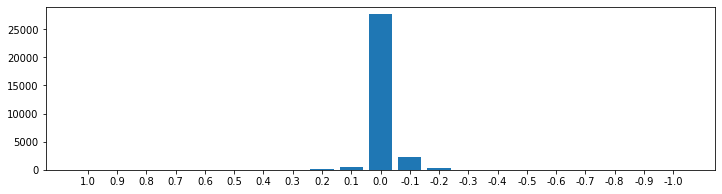

In [76]:
plt.figure(figsize=(12, 3))
plt.bar(x, count)
plt.xticks(x, x_axis)

plt.show()

In [77]:
print(count)

[0, 0, 0, 0, 0, 3, 8, 15, 101, 556, 27588, 2351, 249, 18, 6, 2, 0, 0, 0, 0, 0]


- cosine 유사도: 0.2 이상 추천

#### 유클리디안 유사도

In [78]:
print(min(pref_euclidean_pred_matrix.min()), max(pref_euclidean_pred_matrix.max()))

0.0 0.3106194807588507


In [114]:
x_axis = np.arange(0.3, -0.02 , -0.02)
x = np.arange(len(x_axis))
count = [0] * len(x_axis)

for i in range(len(x_axis)):
    x_axis[i] = '{:.2f}'.format(x_axis[i])
    
for i in range(len(users)):
    recomm = show_result(False, only_like, pref_euclidean_pred_matrix, i, -1, 1, 3)
    
    for k in range(len(recomm)):
        idx = recomm.iloc[k, 0] // 0.02
        count[len(x_axis)-int(idx)-1] += 1

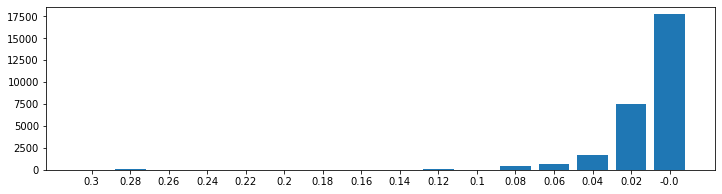

In [115]:
plt.figure(figsize=(12, 3))
plt.bar(x, count)
plt.xticks(x, x_axis)

plt.show()

In [116]:
print(count)

[30, 106, 0, 33, 8, 4, 9, 4, 2, 100, 1, 387, 660, 1737, 7533, 17679]


- 0에 가까울수록 유사

#### 자카드 유사도

In [117]:
x_axis = np.arange(1, -0.1, -0.1)
x = np.arange(len(x_axis))
count = [0] * len(x_axis)

for i in range(len(x_axis)):
    x_axis[i] = '{:.2f}'.format(x_axis[i])
    
for i in range(len(users)):
    recomm = show_result(False, only_like, pref_jaccard_pred_matrix, i, -1,1, 3)
    
    for k in range(len(recomm)):
        idx = recomm.iloc[k, 0] // 0.1
        count[10-int(idx)] += 1

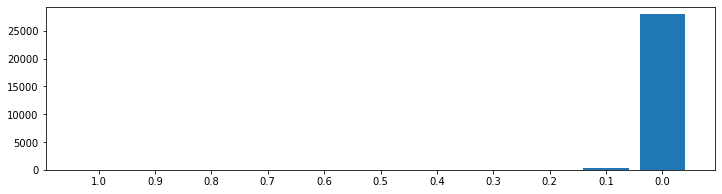

In [118]:
plt.figure(figsize=(12, 3))
plt.bar(x, count)
plt.xticks(x, x_axis)

plt.show()

In [120]:
print(count)

[0, 0, 0, 0, 1, 0, 1, 11, 39, 274, 27967]


- jaccard 유사도: 0.2 이상 추천